## Loading CLIPpy model

In [1]:
import os
import sys

os.chdir("../src")

In [2]:
import torch
from utils import get_similarity, vis_prediction
from open_clip import create_model_and_transforms, get_tokenizer

pretrained_ckpt = "/raid/kanchana/checkpoints/open_clip/clippy_best/clippy_5k.pt"

tokenizor = get_tokenizer("clippy-B-16")
clippy, preprocess_train, preprocess_val = create_model_and_transforms(
        "clippy-B-16",
        pretrained=pretrained_ckpt
    )

## Run inference

In [3]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

img = Image.open("../notebooks/test.png").resize((224, 224))
img_arr = np.array(img)

print(img_arr.shape)

(224, 224, 3)


In [4]:
sample_text = ["cat", "dog", "bird", "background", "tree", "plants", "green"]
sample_prompts = [f"a photo of a {x}" for x in sample_text]

image_vector = clippy.encode_image(preprocess_val(img).unsqueeze(0), pool=False)[:, 1:]
text_vector = clippy.text.encode(sample_prompts, convert_to_tensor=True)
print(image_vector.shape, text_vector.shape)

similarity = get_similarity(image_vector, text_vector, (224, 224), do_argmax=True)
print(similarity.shape)

torch.Size([1, 196, 768]) torch.Size([7, 768])
torch.Size([1, 1, 224, 224])


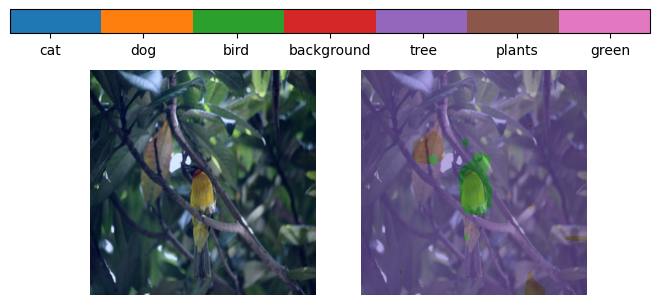

In [5]:
vis_prediction(sample_text, img_arr, similarity[0, 0])

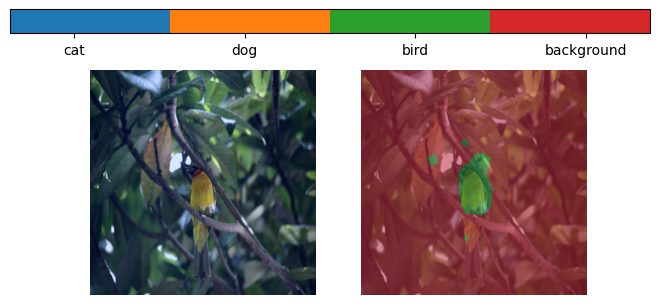

In [6]:
group = 3

if group:
    similarity[similarity > group] = group
    sample_text = sample_text[:group + 1]
    
vis_prediction(sample_text, img_arr, similarity[0, 0])